# CALIDAD DE DATOS

## IMPORTACIÓN DE PAQUETES

In [29]:
import numpy as np 
import pandas as pd
from janitor import clean_names

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split



## IMPORTAR LOS DATOS

In [3]:
df = pd.read_csv('../../02_Datos/03_Trabajo/trabajo.csv')
df.head()

,Unnamed: 0,WIFI1,WIFI2,WIFI3,WIFI4,WIFI5,WIFI6,WIFI7,room
0,0,-64,-56,-61,-66,-71,-82,-81,1
1,2,-63,-60,-60,-67,-76,-85,-84,1
2,3,-61,-60,-68,-62,-77,-90,-80,1
3,4,-63,-65,-60,-63,-77,-81,-87,1
4,5,-64,-55,-63,-66,-76,-88,-83,1


## CORRECCIÓN DE NOMBRES DE VARIABLES

In [4]:
df = clean_names(df)
df.head()

,unnamed_0,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,room
0,0,-64,-56,-61,-66,-71,-82,-81,1
1,2,-63,-60,-60,-67,-76,-85,-84,1
2,3,-61,-60,-68,-62,-77,-90,-80,1
3,4,-63,-65,-60,-63,-77,-81,-87,1
4,5,-64,-55,-63,-66,-76,-88,-83,1


In [5]:
#Eliminamos la variable unnamed_0

df = df.drop(columns= 'unnamed_0', axis=1)

## VISIÓN GENERAL

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   wifi1   1400 non-null   int64
 1   wifi2   1400 non-null   int64
 2   wifi3   1400 non-null   int64
 3   wifi4   1400 non-null   int64
 4   wifi5   1400 non-null   int64
 5   wifi6   1400 non-null   int64
 6   wifi7   1400 non-null   int64
 7   room    1400 non-null   int64
dtypes: int64(8)
memory usage: 87.6 KB


## TIPOS DE DATOS

In [7]:
df.dtypes

wifi1    int64
wifi2    int64
wifi3    int64
wifi4    int64
wifi5    int64
wifi6    int64
wifi7    int64
room     int64
dtype: object

No se tiene que ninguna modificación el tipo de  datos

## VALORES ÚNICOS

In [8]:
df.nunique().sort_values()

room      4
wifi2    26
wifi3    32
wifi6    34
wifi7    35
wifi5    48
wifi1    54
wifi4    57
dtype: int64

No hay valores únicos.

## DUPLICADOS

In [9]:
df.duplicated().sum()

0

No hay duplicados

## NULOS

In [10]:
df.isna().sum()


wifi1    0
wifi2    0
wifi3    0
wifi4    0
wifi5    0
wifi6    0
wifi7    0
room     0
dtype: int64

No hay nulos

## SEPARAR NUMÉRICAS

In [11]:
num = df.select_dtypes( include= 'number').copy()

## GESTIÓN DE NUMÉRICAS

In [12]:
def estadisticos_cont(df_cont):
    #Calculamos describe
    estadisticos = df_cont.describe().T
    #Añadimos la mediana
    estadisticos['median'] = df_cont.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
wifi1,1400.0,-52.533571,-56.0,11.278096,-73.0,-61.0,-56.0,-46.0,-10.0
wifi2,1400.0,-55.601429,-56.0,3.480323,-74.0,-58.0,-56.0,-53.0,-45.0
wifi3,1400.0,-54.952857,-55.0,5.335686,-73.0,-58.0,-55.0,-51.0,-41.0
wifi4,1400.0,-53.820000,-56.0,11.467349,-77.0,-63.0,-56.0,-47.0,-11.0
wifi5,1400.0,-62.475714,-64.0,9.146695,-89.0,-69.0,-64.0,-55.0,-36.0
wifi6,1400.0,-81.170000,-82.0,6.378436,-96.0,-86.0,-82.0,-78.0,-62.0
wifi7,1400.0,-81.922857,-83.0,6.453090,-98.0,-87.0,-83.0,-78.0,-63.0
room,1400.0,2.517143,3.0,1.127849,1.0,1.0,3.0,4.0,4.0


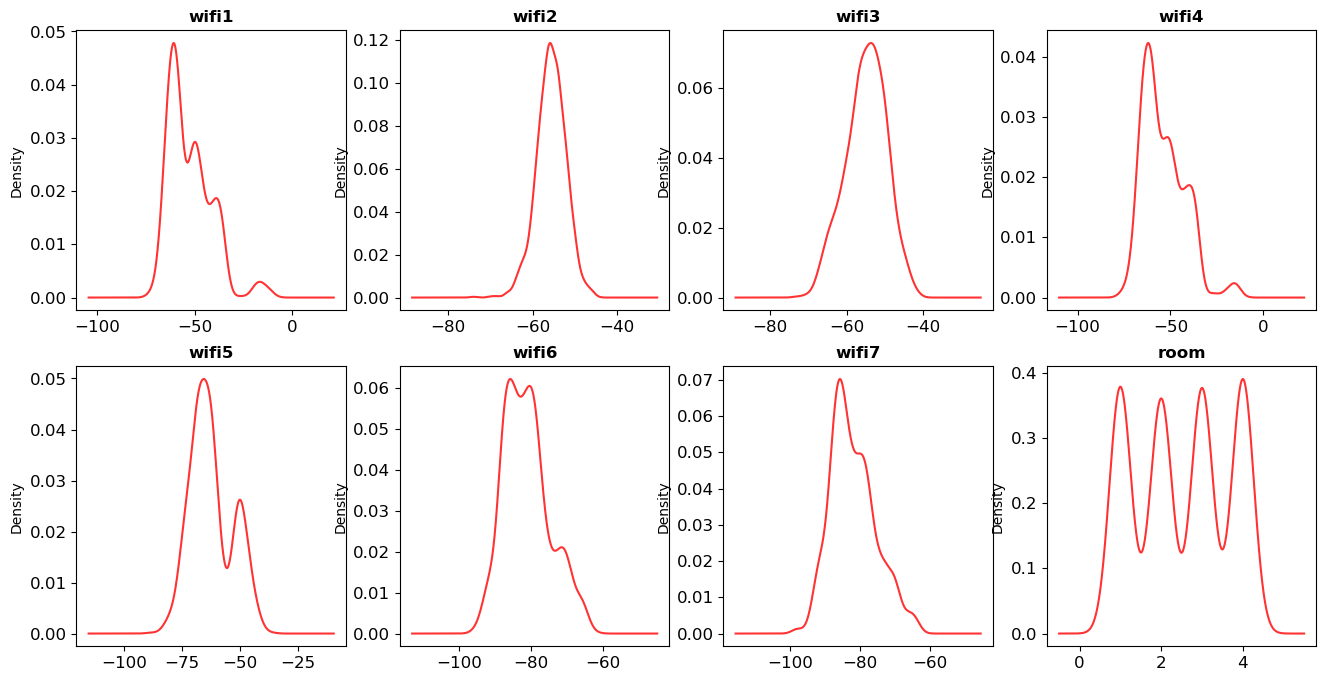

In [13]:
def graficos_eda_continuas(df_cont):
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(df_cont.shape[1] / 4)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 4, figsize = (16, filas * 4))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(df_cont):
        df_cont[variable].plot.density(ax = ax[cada], color = 'r', alpha= 0.8)
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)
    
graficos_eda_continuas(num)

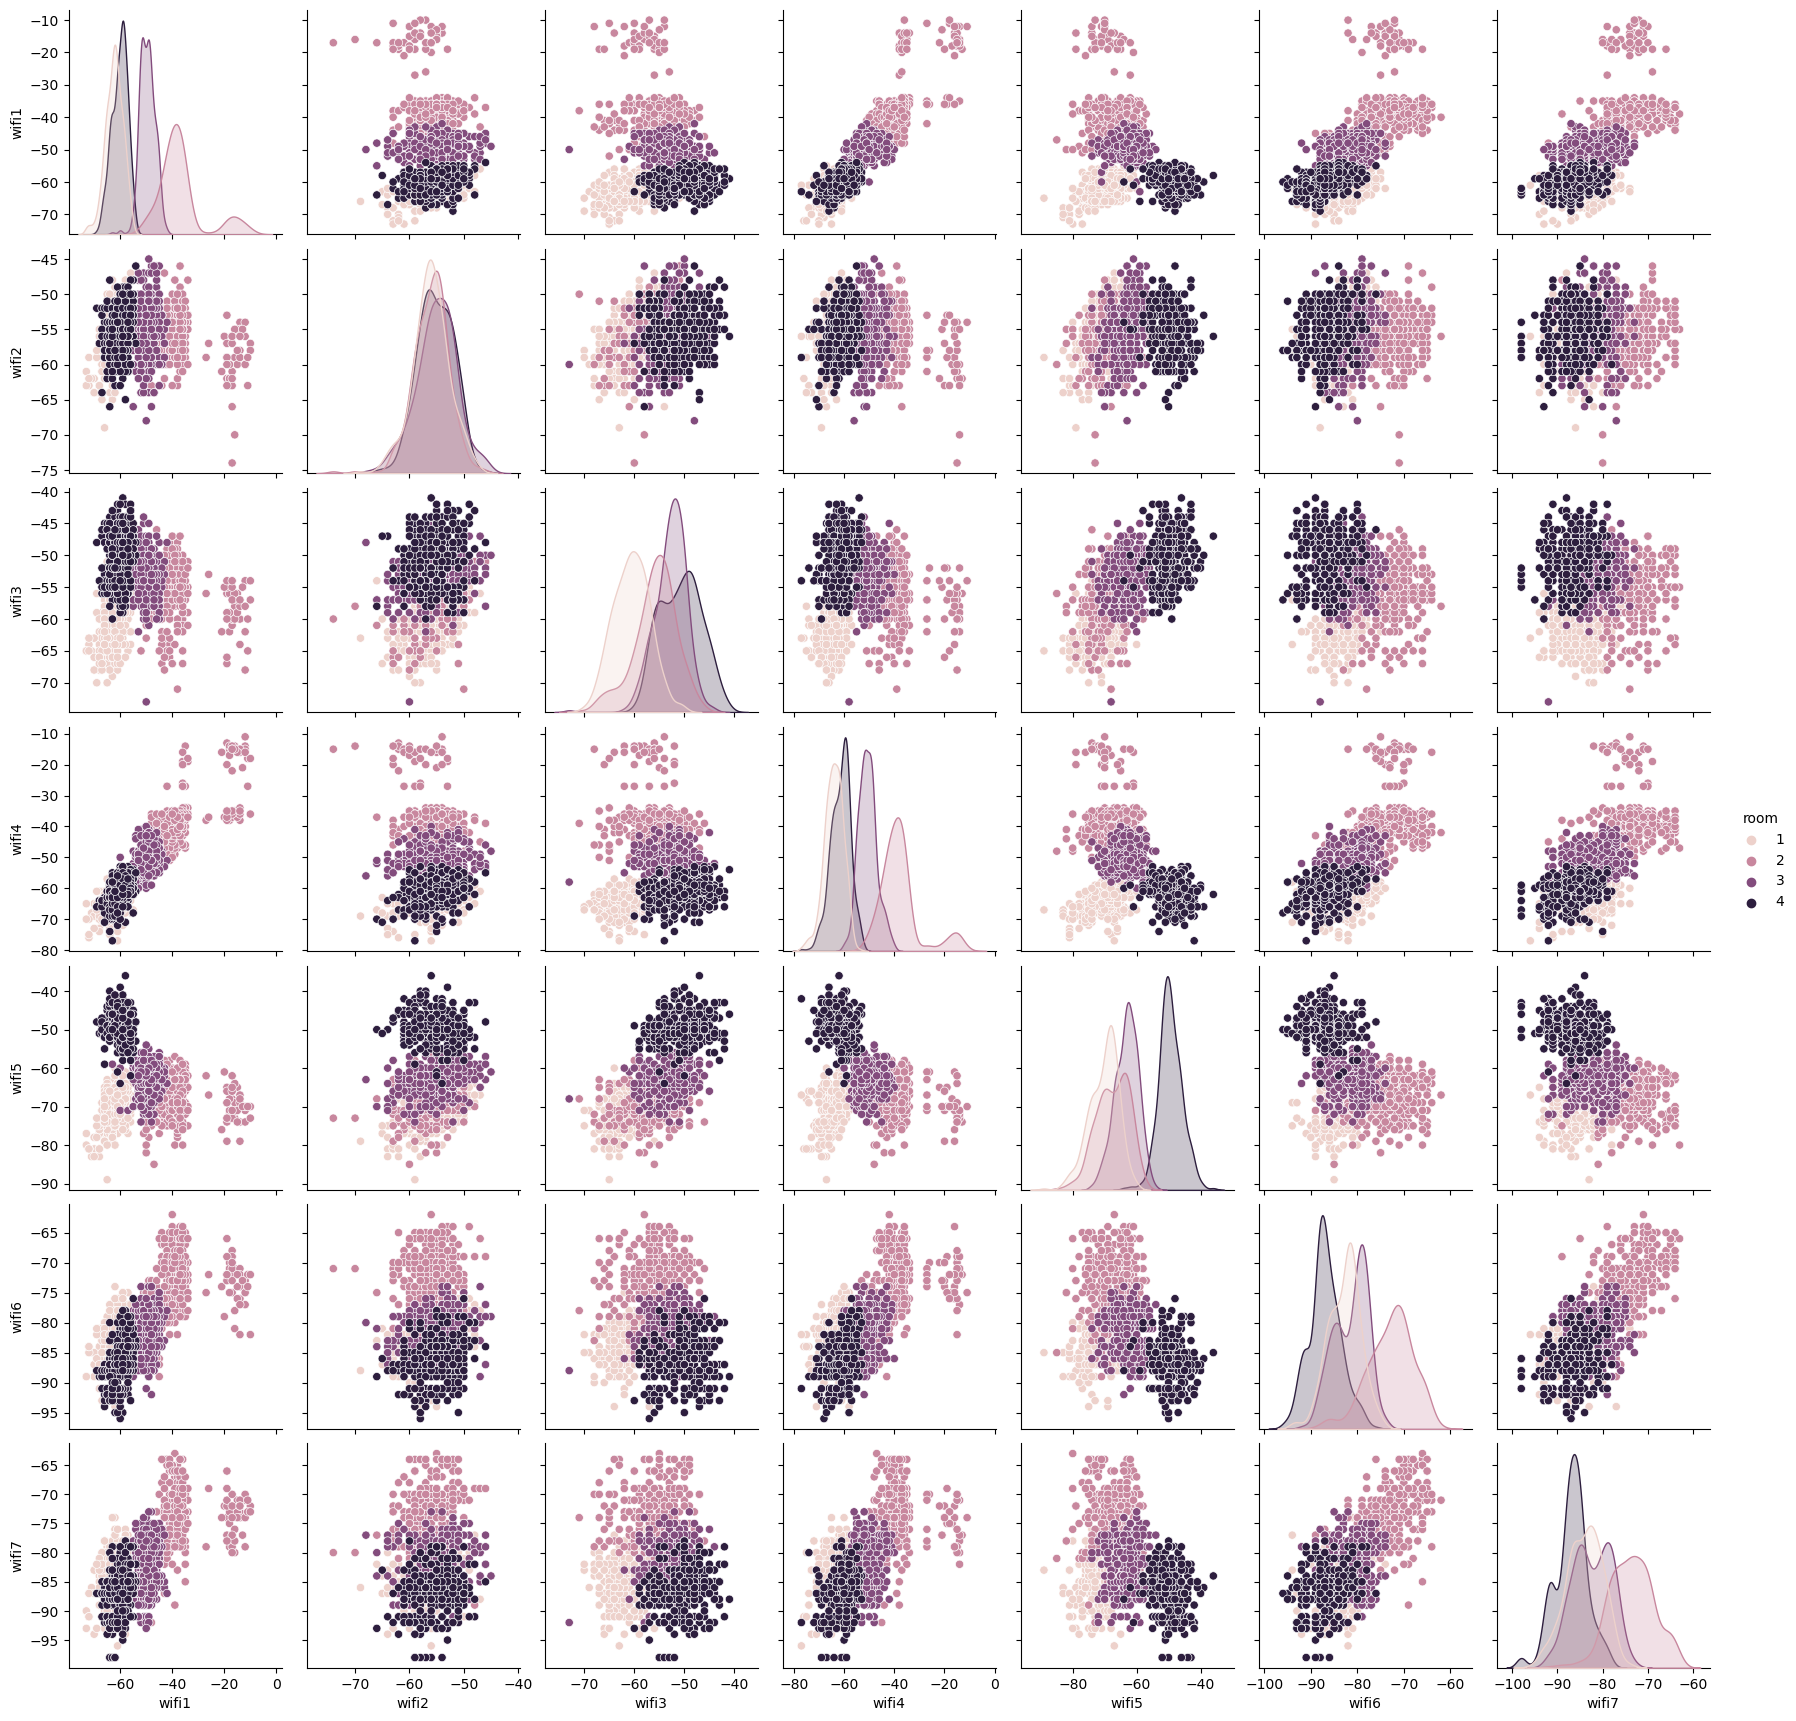

In [14]:
sns.pairplot(num, hue= 'room');

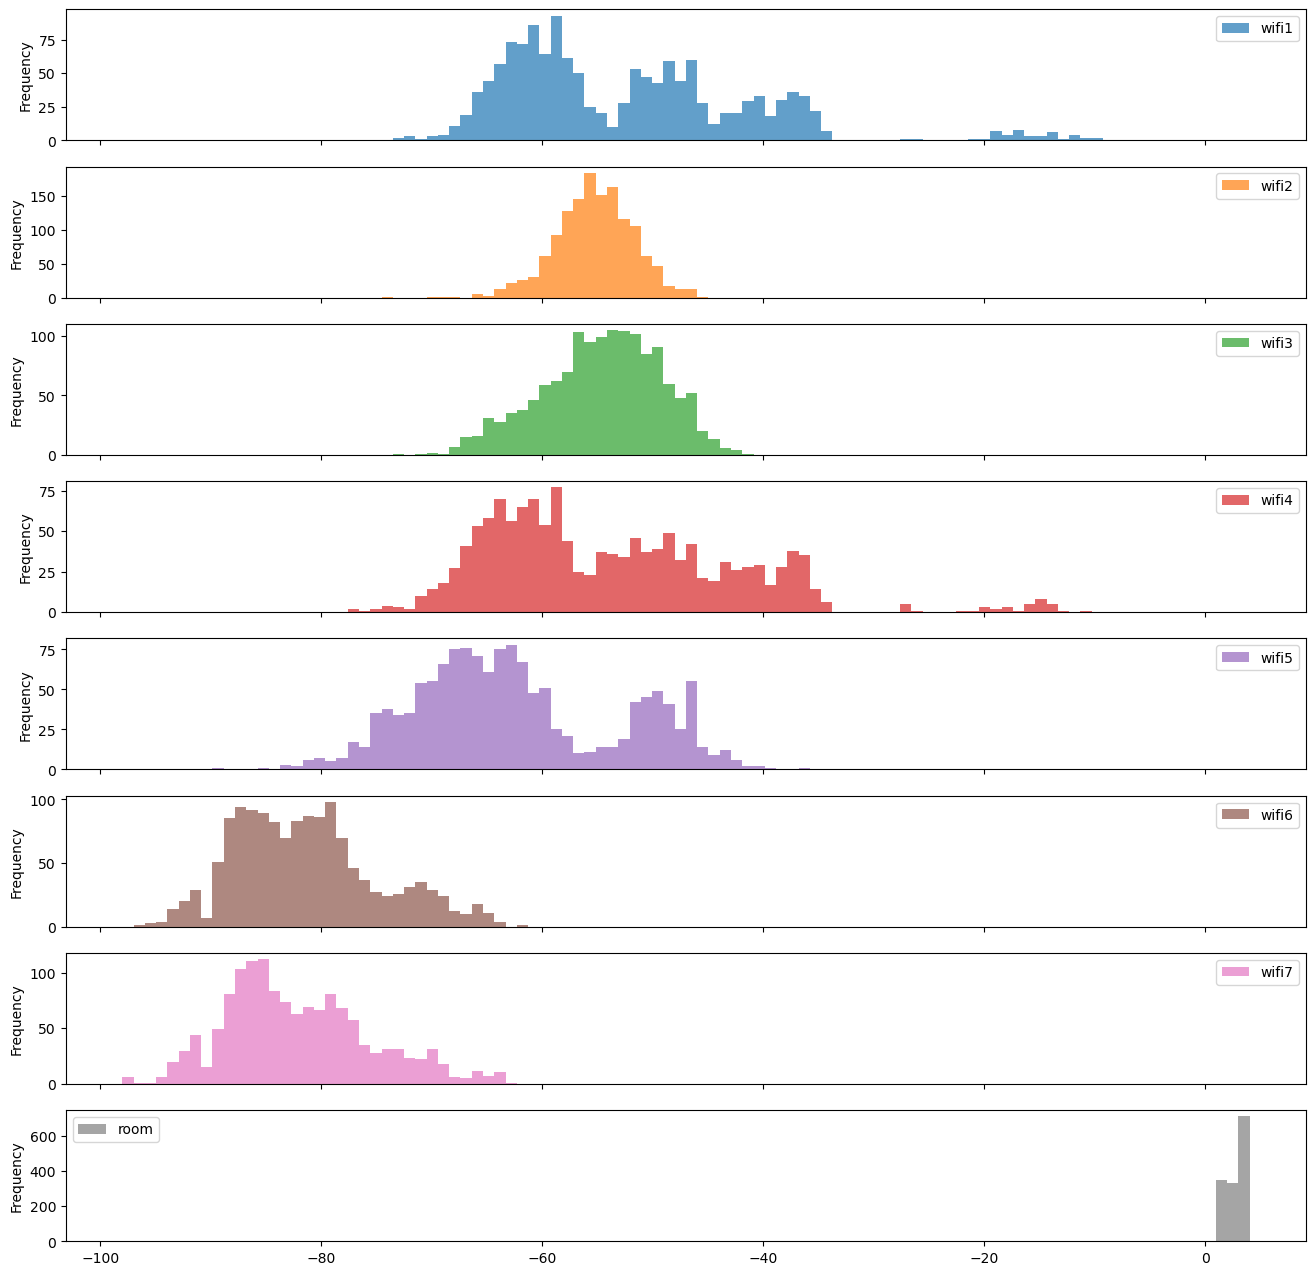

In [15]:
num.plot.hist(subplots=True,bins=100, figsize=(16,16), alpha = 0.7);

<Axes: >

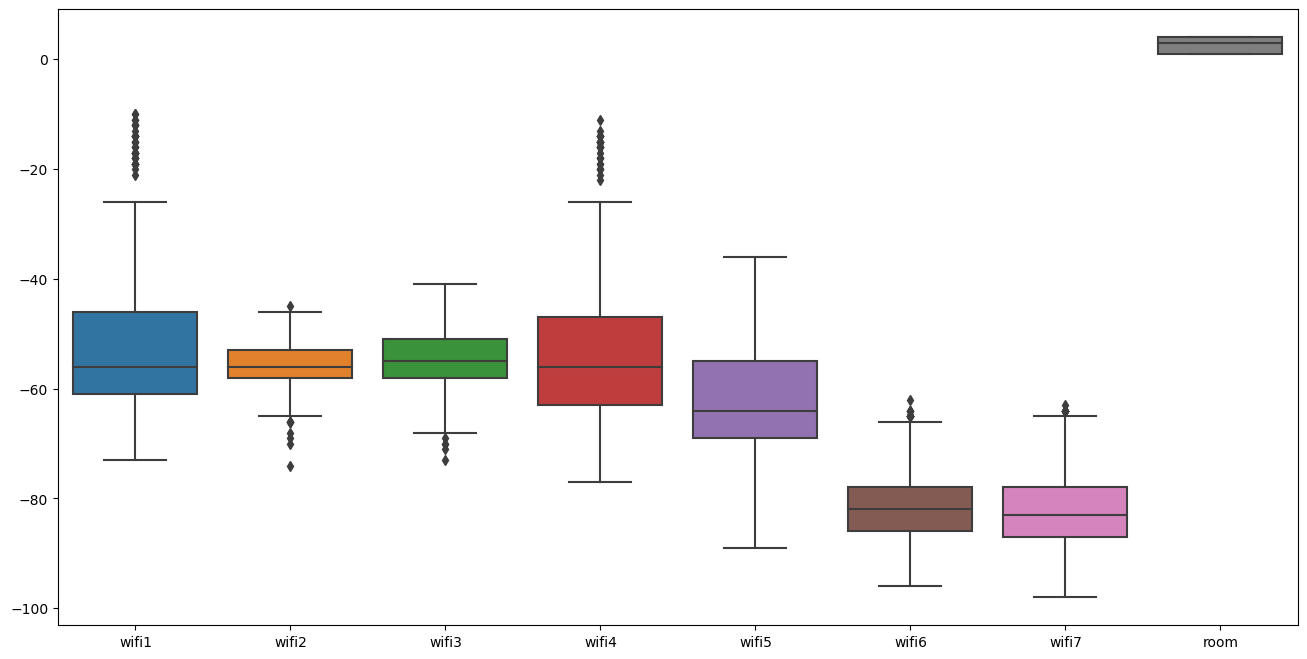

In [16]:
plt.figure(figsize= (16,8))
sns.boxplot(num)

## VERIFICAR TAMAÑO DE LOS DATASETS

In [17]:
num.shape

(1400, 8)

## PRESELECCIÓN DE MEJOR MODELO SEGÚN LAZY PREDICT

### Separar predictoras y target

In [24]:
x = df.drop(columns= 'room').copy()
y = df.room.copy()

### DATASET DE TRAIN Y TEST

In [32]:
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size= 0.3, random_state= 1)

### MODELIZAR MEJOR MODELO (LAZYPREDICT)

In [ ]:
reg = LazyClassifier(verbose=0)
models, predictions = reg.fit(train_x, val_x, train_y, val_y)

In [38]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelPropagation,0.99,0.99,None,0.99,0.04
LabelSpreading,0.99,0.99,None,0.99,0.05
LGBMClassifier,0.98,0.98,None,0.98,0.17
ExtraTreesClassifier,0.98,0.98,None,0.98,0.13
RandomForestClassifier,0.98,0.98,None,0.98,0.18
QuadraticDiscriminantAnalysis,0.98,0.98,None,0.98,0.01
GaussianNB,0.98,0.98,None,0.98,0.01
BaggingClassifier,0.98,0.98,None,0.98,0.03
KNeighborsClassifier,0.98,0.98,None,0.98,0.02


## GUARDAR DATASETS TRAS CALIDAD DE DATOS

In [18]:
ruta_trabajo = '../../02_Datos/03_Trabajo/' + 'tablon_analitico.pickle'
ruta_num = '../../02_Datos/03_Trabajo/' + 'num_resultado_calidad.pickle'

In [19]:
df.to_pickle(ruta_trabajo)
num.to_pickle(ruta_num)